![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions. This data does contain null values and some outliers, but handling these is out of scope for the project. Feel free to experiment after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [1]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Import data
df = pd.read_csv('data/netflix_data.csv')
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111,A scrappy but poor boy worms his way into a ty...,Dramas
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,44,"In this documentary, South African rapper Nast...",Documentaries
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,1,Dessert wizard Adriano Zumbo looks for the nex...,International TV
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,United Kingdom,"March 1, 2020",2019,90,This documentary delves into the mystique behi...,Documentaries


In [2]:
# Filter data to remove TV shows
netflix_subset = df[df['type'] != 'TV Show']
netflix_subset.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies


In [8]:
# Subset the data to specific columns needed
netflix_movies = df[['title', 'country', 'genre', 'release_year', 'duration']]
netflix_movies.head()

,title,country,genre,release_year,duration
0,3%,Brazil,International TV,2020,4
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123


In [11]:
# Movies shorter than 60 minutes
shorter_movies = netflix_movies[netflix_movies['duration'] < 60]
shorter_movies

,title,country,genre,release_year,duration
0,3%,Brazil,International TV,2020,4
5,46,Turkey,International TV,2016,1
11,1983,Poland,Crime TV,2018,1
12,1994,Mexico,Crime TV,2019,1
16,Feb-09,NaN,International TV,2018,1
...,...,...,...,...,...
7775,Zoids Wild,Japan,Anime Series,2018,1
7777,Zombie Dumb,NaN,Kids,2018,2
7779,Zona Rosa,Mexico,International TV,2019,1
7784,Zulu Man in Japan,NaN,Documentaries,2019,44


In [26]:
# Create a colors list
colors = []
for lab, row in netflix_movies.iterrows():
    if row['genre'] == 'Children':
        colors.append('blue')
    elif row['genre'] == 'Documentaries':
        colors.append('green')
    elif row['genre'] == 'Stand-Up':
        colors.append('red')
    else:
        colors.append('purple')
print(len(colors))

7787


<function matplotlib.pyplot.show(close=None, block=None)>

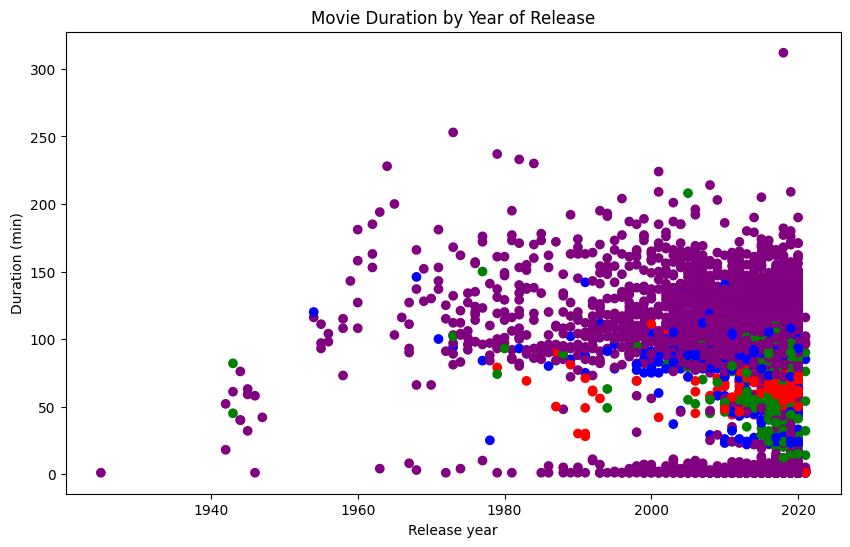

In [29]:
# Plot movie duration by year of release
fig = plt.figure(figsize=(10, 6))
plt.scatter(netflix_movies['release_year'], netflix_movies['duration'], c=colors)
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.title('Movie Duration by Year of Release')
plt.show

In [ ]:
answer = 'no'